<a href="https://colab.research.google.com/github/aquapathos/BasicAI/blob/master/AIChallenge001_%E7%94%BB%E5%83%8F%E3%81%AE%E5%8F%8E%E9%9B%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 画像の収集
画像を認識するためには、まず事前にたくさんの事例をAIに機械学習させておく必要がありますが、
大量の画像を自分で用意するのは大変なので、プログラムで収集することにします。

以下、重要な指示は<font color='blue'>青字</font>にしてありますので、見落とさないように演習を進めていってください。

# 1. Google Drive をマウント
Google Colaboratory は一定時間経過すると作業内容が削除されてしまいます。消したくないデータや後日再利用したいデータは Google Drive に保存するようにプログラムすることで、残すことができます。

1. [次のセルを実行する]()
2. [リンクと入力フィールドが表示されるのでリンクをクリック]()
3. [本人認証が要求されるので、応じる。]()
4. [アクセスリクエストを許可するとアクセス用のコードが表示されるのでコピー]()
5. [下の　Enter your authorization code: の下の枠に貼り付けて Enter]()
6. [左のエリアで「更新」をクリック（エリアが表示されていないなら「＞」マークをクリックし，「ファイル」をクリック．]()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. 画像の収集と選別
## 2.1 画像の収集

画像を収集するために必要なライブラリを準備します。  [次のセルを実行]() 


In [0]:
import glob
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
!pip install icrawler
from icrawler.builtin import GoogleImageCrawler

SIZE = 128 # リサイズ後の画像の高さと幅

機械学習の際に画像のサイズをすべて同じに揃えます。 SIZE はそのサイズです。このサイズを大きくすると画像は鮮明になりますが、学習に時間がかかってしまいます。どれくらいのサイズが適当なのかは、何をしたいかによりますが、対象が何かを見分けるだけならこの程度で十分です。

### 画像収集の例　　ネコの画像をあつめてみる
ネット上で公開されている画像を収集するためのライブラリ、icrawler を使って画像を収集します。
今回は Google から画像を拾ってくることにします。

次のセルは、猫の画像を最大２００枚まで収集して、一旦 Google Drive の　マイドライブ内の 'tmp/ネコ'　という名のフォルダに保存するプログラムです。　　（ "drive/My Drive" が Google Driveのマイドライブを表しています）

**keyword= ["ネコ","猫","cat"]** で検索ワードをしてしています。


[次のセルを実行]() 　　（３分ぐらいかかります）



In [0]:
%%time
max_num = 200 # 収集枚数
TMPFOLDER = 'drive/My Drive/tmp/' # Google ドライブの マイドライブ内の tmp フォルダ
def collectPictures(folderName = "", keywords = [], max_num = 200):
    crawler = GoogleImageCrawler(storage={"root_dir":TMPFOLDER+folderName})
    crawler.crawl(keyword= keywords, max_num=max_num)

collectPictures(folderName = "ネコ", keywords = ["ネコ","猫","cat"])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs


# 2.2 画像の選別

![Google Drive](https://raw.githubusercontent.com/aquapathos/pictures/gh-pages/BasicAIFig001.png)　　　　　　 ![Google Drive](https://raw.githubusercontent.com/aquapathos/pictures/gh-pages/BasicAIFig002.png)   

![Google Drive](https://github.com/aquapathos/pictures/blob/gh-pages/BasicAIFig003.png?raw=true)

1. [ブラウザで新しいタブをつくり、Google Drive を開きます。]()
2. [マイドライブを開き、tmp/ネコ を開きます。]()
3. [リスト名表示からギャラリー表示に切り替えて不適だと思われる画像を削除してください。]()

不適なのは、次のような画像です。
- ネコが写っていない画像。写っていても小さすぎる画像
- 主要被写体がネコではない画像、つまりネコ以外のものが目立っている画像
- 文字が目立つ画像。できれば文字は入っていないことが望ましいですが、目立たなければOK
- デフォルメされたぬいぐるみやイラスト。
- GIF 動画
- 同一の写真

パット見て、これは「ネコ」が主題の写真だと感じられるものを残して、そうでないもの、他のモノが多くの面積を締めているものは削除してください。

# 2.3　画像のリサイズ

何度も使うので関数を定義しておくことにする．  [次のセルを実行]() 

In [0]:
def resize(foldername, size=SIZE):
    imgnames = glob.glob(foldername+"/*") # 画像ファイル名のリスト
    images = []
    for imgname in imgnames:
        img = cv2.cvtColor(np.array(Image.open(imgname).convert('RGBA')),cv2.COLOR_RGBA2BGR)
        height = img.shape[0]
        width = img.shape[1]
        if height > width :
            m = (height - width)//2 
            img = img[m:m+width]
        else:
            m = (width - height)//2
            img = img[:,m:m+height]
        img = cv2.resize(img, (SIZE,SIZE))
        images.append(img)
    return images

さっそくリサイズしてみましょう。　　[次のセルを実行]() 

In [0]:
# リサイズを実行
c1img = resize(TMPFOLDER+"ネコ")
print("ネコ - ", len(c1img),"枚の画像がリサイズされました")

ネコ -  75 枚の画像がリサイズされました


上のプログラムでは、ネコの画像をリサイズし、その集まりを、c1img と名付けています。

表示用関数を定義し、表示して確認してみます。　　[次のセルを実行]() 

In [0]:
import math
# start番からnpic枚表示する関数を定義
plt.rcParams['figure.figsize'] = (12.0, 7.0)
def showimg(images, start = 0, npic = 48):
    n = npic if len(images) >= start+npic else len(images) - start
    plt.figure(figsize=(8,7.5*(math.ceil(n/8))/6),dpi=150)
    i = 0
    while True:
        if i < n :  
            plt.subplot((n-1)//8+1,8,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(images[start+i][:,:,::-1])
            plt.title("{}".format(start+i))
            i += 1
        else:
            break

さっそく表示させてみましょう。　１００枚まで表示と指定していますが、たくさん削除していたら１００枚ないかもしれません。　[次のセルを実行]() 

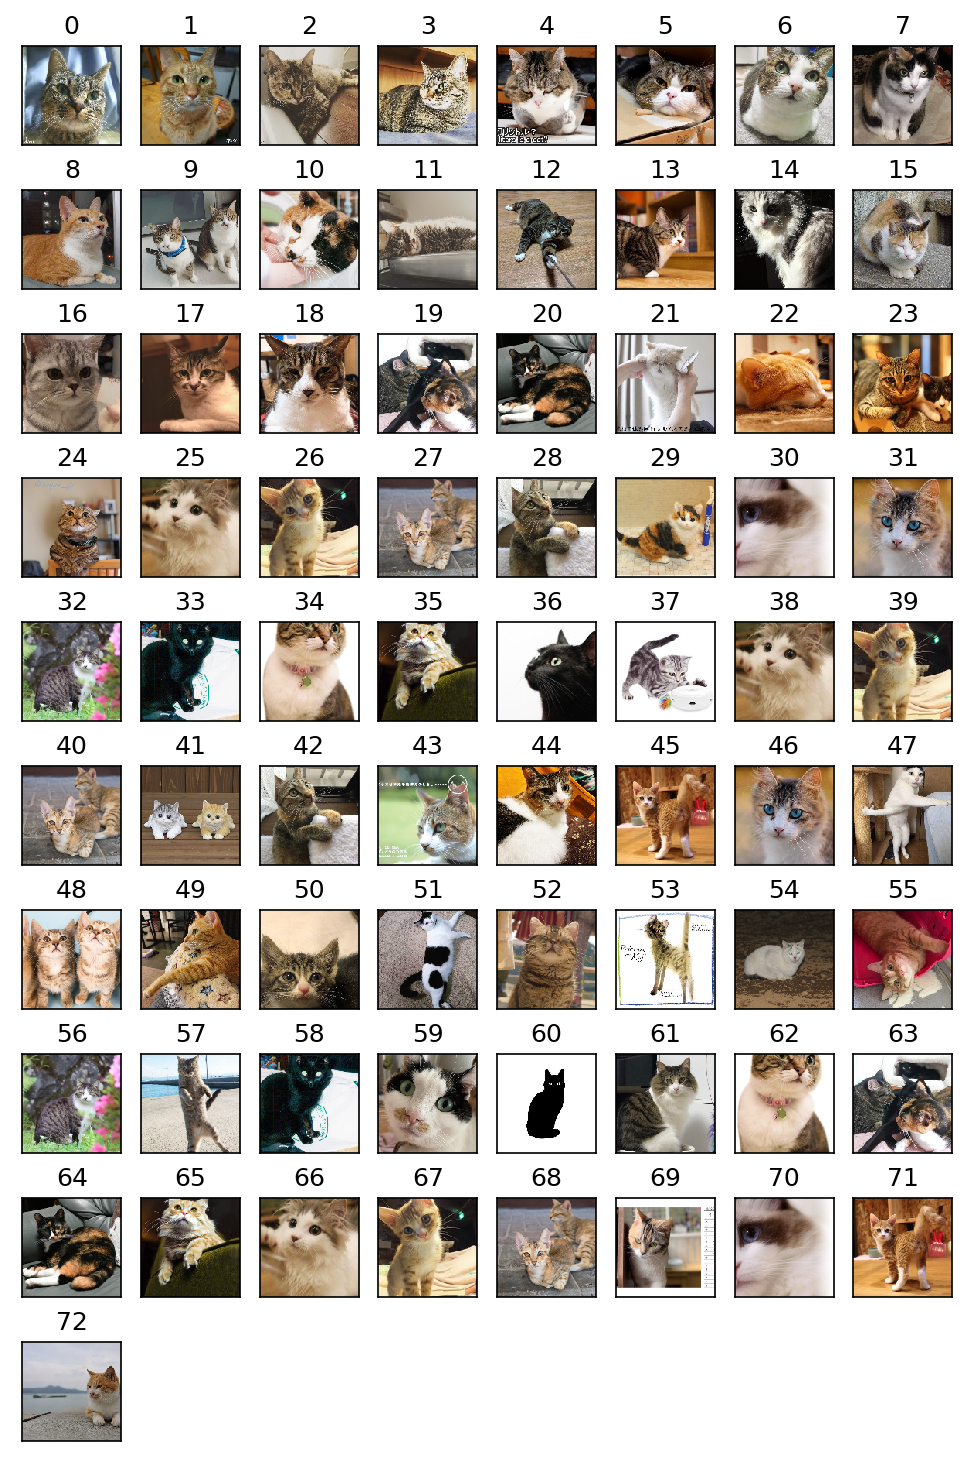

In [0]:
showimg(images = c1img,start=0,npic=100) # c1img の 最初（０番）から100枚までを表示

## 2.4　　不適切画像を再チェック
Google Drive 上で削除漏れした画像や同一の写真が複数枚あることに気づいた場合のために、番号を指定して削除する関数を定義しておきましょう。　　[次のセルを実行]() 

In [0]:
from copy import copy

# メモリ上で番号指定で画像を削除する関数
def delimages(images, dellist=[]):
    newimg = copy(images)
    if len(dellist)>0:
        for i, img in enumerate(dellist):
            del newimg[img-i]
    if len(dellist)>0:
        showimg(newimg,dellist[0])
    return newimg

# 削除関数の使用例
0 、１、２０、２５番を削除したい場合は次のコマンドを実行します。  
**delimages(c1img, [0,1,20,25])**

<font color='red'>注意 削除する番号は必ず昇順とすること．[20,25,1,0] のように大きい番号のあとに小さい番号が来てはいけない．</font>


削除したい画像がある場合は、次のセルの [] にその番号をカンマ(,)で区切って並べ、実行してください。

In [0]:
c1img = delimages(c1img, [])

# 2.5　　同様にして別のカテゴリの画像を集める．

こんどはイヌの画像を集めてみよう。 

In [0]:
%%time
collectPictures(folderName = "イヌ", keywords = ["イヌ","犬","dog"])

## ネコと同じ要領で画像を選別

[google drive 上で画像を選別し、不適切な画像を削除してください。]()

In [0]:
c2img = resize(TMPFOLDER+"イヌ")
print("イヌ - ", len(c２img),"枚の画像がリサイズされました")

イヌ -  46 枚の画像がリサイズされました


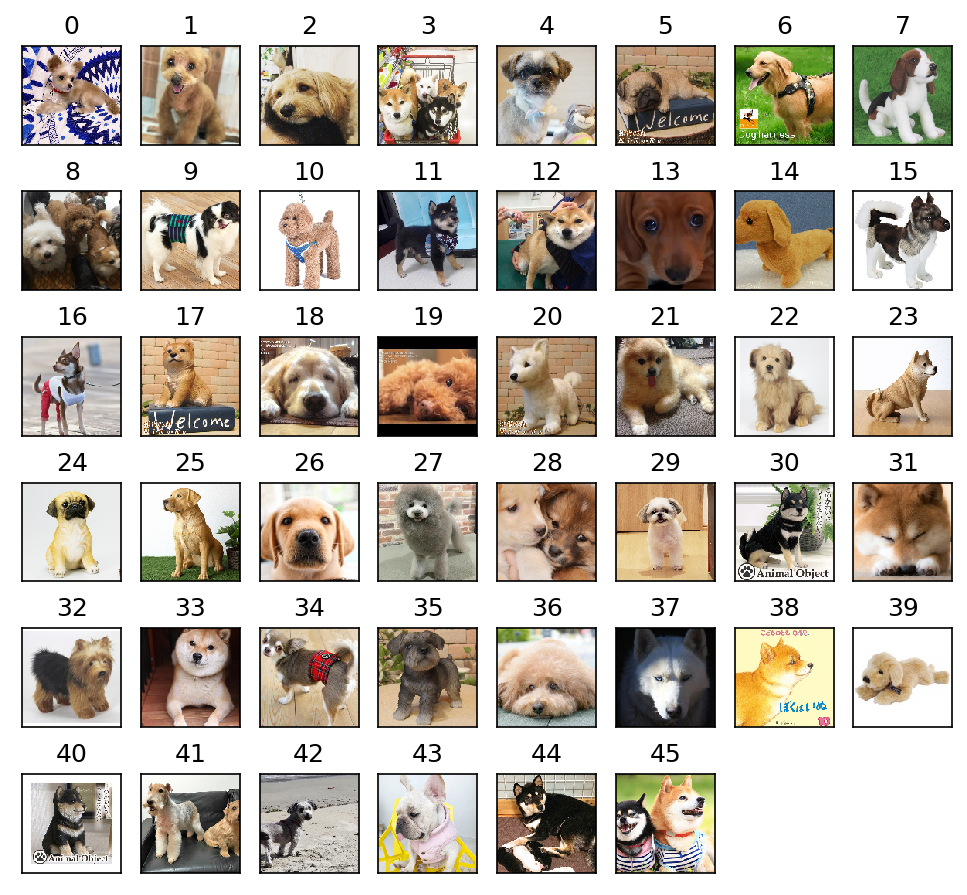

In [0]:
showimg(images = c2img,start = 0,npic = 100)

削除したい画像がある場合は、次のセルの [] にその番号をカンマ(,)で区切って並べ、実行してください。



In [0]:
ｃ２img = delimages(c2img, [])

# ３．　学習用画像データの保存と読み込み
サイズが正規化され、選別ずみの画像はこの時点で c1img, c2img という名の python オブジェクト内に入っており、メモリ上に置かれています。

これらはGoogle Colaboratory を終了したり、一定時間経過すると消えてしまい、再利用できません。　

## 3.1 データの保存と読み出しの関数を定義
python にはメモリ上に置かれた変数の値をそっくりそのままファイルとして保存する関数が用意されていますので、その関数を使って変数の中身を Google ドライブに保存したり、読み出したりできるようにしておきます。[次のセルを実行]() 

In [0]:
import pickle
import os

# 画像データを pickle 形式で保存
def storeCategoryImages(cat, fname, folder = "."):
    os.makedirs(folder, exist_ok=True)
    f = open(folder+"/"+fname,'wb')
    pickle.dump(cat,f)
    f.close
    
# pickle 形式で保存された画像データの読み込み
def loadCategoryImages(fname, folder = "."):
    f = open(folder+"/"+fname,'rb')
    cat = pickle.load(f)
    f.close
    return cat

## 3.2 変数内のデータをファイルとして出力

さっそく c1img（ネコ画像の集まり） と c2img（イヌ画像の集まり）を　pickle 形式で保存しましょう。[次のセルを実行]() 

In [0]:
GFOLDER = "drive/My Drive/LDATA"  # データ保存用のフォルダ名
storeCategoryImages(c1img,"ネコ.pkl",folder=GFOLDER)
storeCategoryImages(c2img,"イヌ.pkl",folder=GFOLDER)

# 3.2 学習用画像データの読み込み

今度は逆に、pickle 形式で保存されたデータを変数に読み込み、正しく復元できるか確認しておきましょう。[次のセルを実行]() 

In [0]:
testimg = loadCategoryImages("ネコ.pkl", folder=GFOLDER)
showimg(images = testimg,start = 3)

# 「[AIChallenge001-学習と識別](https://github.com/aquapathos/Demo/blob/master/%E7%94%BB%E5%83%8F%E8%AD%98%E5%88%A5%E3%81%AE%E5%AE%9F%E9%A8%93Google_Colab%E7%89%88%EF%BC%92%E3%80%80%E5%AD%A6%E7%BF%92%E3%81%A8%E8%AD%98%E5%88%A5.ipynb)」へつづく

# 課題実行のためのヒント
画像の収集

In [0]:
# collectPictures(folderName = "カメ", keywords = ["カメ","亀","turtle"])
# collectPictures(folderName = "ニワトリ", keywords = ["ニワトリ","鶏","chicken"])
# collectPictures(folderName = "ハムスター", keywords = ["ハムスター","hamster"])

リサイズ

In [0]:
# c3img = resize(TMPFOLDER+"カメ")
# print("イヌ - "len(c２img),"枚の画像がリサイズされました")
# c4img = resize(TMPFOLDER+"ニワトリ")
# print("ニワトリ - ",len(c２img),"枚の画像がリサイズされました")
# c5img = resize(TMPFOLDER+"ハムスター")
# print("ハムスター - ",len(c２img),"枚の画像がリサイズされました")

データの保存

In [0]:
# storeCategoryImages(c3img,"カメ.pkl",folder=GFOLDER)
# storeCategoryImages(c4img,"ニワトリ.pkl",folder=GFOLDER)
# storeCategoryImages(c5img,"ハムスター.pkl",folder=GFOLDER)